<a href="https://colab.research.google.com/github/ZataraHere/Automatic-Image-Captioning/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycocotools


In [2]:
from pycocotools.coco import COCO


In [3]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip


--2025-01-14 12:01:39--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.119.81, 52.217.174.9, 3.5.29.55, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.119.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  15.9MB/s    in 17s     

2025-01-14 12:01:57 (13.8 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [4]:
# Path to the annotation file
annotation_file = '/content/annotations/instances_train2017.json'

# Initialize COCO API
coco = COCO(annotation_file)


loading annotations into memory...
Done (t=27.98s)
creating index...
index created!


In [5]:
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]
print("COCO Categories:", category_names)


COCO Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
cat_ids = coco.getCatIds(catNms=['zebra'])  # Replace 'zebra' with any category name
img_ids = coco.getImgIds(catIds=cat_ids)
print(f"Number of images containing 'zebra': {len(img_ids)}")


Number of images containing 'zebra': 1916


In [7]:
img_info = coco.loadImgs(img_ids[0])[0]
print(img_info)


{'license': 1, 'file_name': '000000499716.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000499716.jpg', 'height': 409, 'width': 640, 'date_captured': '2013-11-18 22:12:32', 'flickr_url': 'http://farm1.staticflickr.com/50/109516337_271b7d7044_z.jpg', 'id': 499716}


In [12]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, '/content/annotations/instances_train2017.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, '/content/annotations/captions_train2017.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=21.66s)
creating index...
index created!
loading annotations into memory...
Done (t=4.33s)
creating index...
index created!


http://images.cocodataset.org/train2017/000000484044.jpg


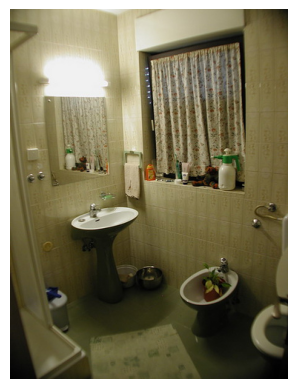

a photo of a bathroom with a sink and a toilet and a mirror
The small bathroom has a bidet next to the toilet.
a white bathroom with a toilet a sink a shower and a mirror
A bathroom with a sink, bidet, toilet and a flower curtain. 
A bathroom with a small window with white fixtures


In [13]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)